# 21MAI0025 Y C Karthik Reddy
# 21MAI0046 Salman Sirumavilla

# Classifiers :-

## Ada Boost
## SVC
## K-Nearest Neighbor
## Logistic Regression.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("c:/Users/DELL/Desktop/ml/imbd.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data=data[0:1000]

## Preprocessing Data

In [5]:
from nltk.corpus import stopwords

In [6]:
stopw=stopwords.words('english')

In [7]:
from nltk.tokenize import word_tokenize

In [9]:
for i in range(len(data)):
    data['review'][i]=data['review'][i].lower()

In [11]:
data['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [12]:
import re

In [14]:
for i  in range(len(data)):
    data['review'][i]=re.sub("<.*?>"," ",data['review'][i])
    data['review'][i]=re.sub(r"[^a-zA-Z0-9]"," ",data['review'][i])
                             

In [15]:
data['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away   i would say the main appeal of the show is due to the fact that it goes where other sh

In [17]:
data.shape

(1000, 2)

In [18]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [19]:
X=data['review']
y=data['sentiment']

## Splitting dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750,), (250,), (750,), (250,))

## Tfidf Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [23]:
vect=TfidfVectorizer()
X_train=vect.fit_transform(X_train)

In [27]:
X_test=vect.transform(X_test)

In [28]:
X_train.shape, X_test.shape

((750, 15422), (250, 15422))

In [29]:
X_train[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [30]:
la=LabelEncoder()
y_train=la.fit_transform(y_train)
y_test=la.transform(y_test)

## Random Forest Hyper Parameter Tuning

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
search = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators': [50, 100, 200, 500], 'criterion':["gini", "entropy"]}, scoring=["accuracy"], refit=False, return_train_score=True)

In [33]:
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 500]},
             refit=False, return_train_score=True, scoring=['accuracy'])

In [34]:
search.cv_results_

{'mean_fit_time': array([0.25632305, 0.45733199, 0.95182247, 2.55583949, 0.24111199,
        0.46827602, 0.93452368, 2.58281646]),
 'std_fit_time': array([0.02425448, 0.04971309, 0.10265477, 0.16347654, 0.01939253,
        0.01148602, 0.01003987, 0.41569561]),
 'mean_score_time': array([0.01579452, 0.01461277, 0.03690929, 0.08511052, 0.00939155,
        0.0143425 , 0.01875482, 0.08430033]),
 'std_score_time': array([0.0099092 , 0.00838031, 0.00791742, 0.01539505, 0.00766825,
        0.00310431, 0.006242  , 0.0102297 ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 200, 500, 50, 100, 200, 500],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),

In [35]:
search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 500]},
             refit=False, return_train_score=True, scoring=['accuracy'])>

In [36]:
rf=RandomForestClassifier(criterion="entropy", n_estimators=200)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [38]:
y_train_pred=rf.predict(X_train)

In [39]:
y_test_pred=rf.predict(X_test)

## Model Evaluation

<AxesSubplot:>

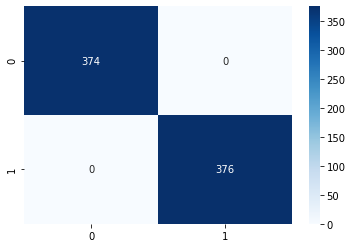

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:>

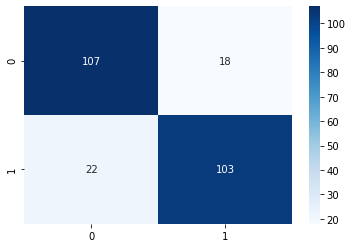

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       125
           1       0.85      0.82      0.84       125

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



## SVC

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [44]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [45]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.4s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.4s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [46]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [48]:
clf_svc=SVC(C=100,gamma=0.1,kernel='rbf')

In [49]:
clf_svc.fit(X_train,y_train)

SVC(C=100, gamma=0.1)

In [50]:
y_train_pred=clf_svc.predict(X_train)

In [51]:
y_test_pred=clf_svc.predict(X_test)

## Model Evaluation

<AxesSubplot:>

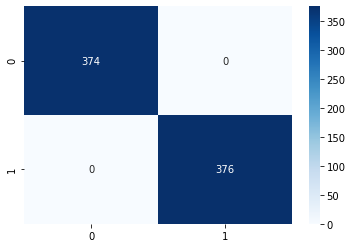

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:>

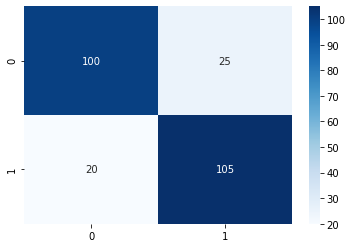

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       125
           1       0.81      0.84      0.82       125

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



## K-Nearest Neighbor

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [60]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [62]:
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [63]:
grid_search.cv_results_

{'mean_fit_time': array([0.00159719, 0.00156648, 0.        , 0.00157313, 0.00155587,
        0.00312715, 0.        , 0.00156319, 0.00316119, 0.00155683,
        0.00156379, 0.0016685 , 0.        , 0.00156889, 0.        ,
        0.00173273, 0.        , 0.00468798, 0.00156145, 0.00355909,
        0.00312533, 0.0016052 , 0.00080042, 0.        , 0.00047922,
        0.00155635, 0.        , 0.00160155, 0.00156212, 0.00312452]),
 'std_fit_time': array([0.0031944 , 0.00469944, 0.        , 0.0047194 , 0.00466762,
        0.00625431, 0.        , 0.00468957, 0.00632301, 0.00467048,
        0.00469136, 0.00466609, 0.        , 0.00470667, 0.        ,
        0.00468916, 0.        , 0.00716102, 0.00468435, 0.00618356,
        0.00625067, 0.00321045, 0.00240126, 0.        , 0.00143766,
        0.00466905, 0.        , 0.00480466, 0.00468636, 0.00624905]),
 'mean_score_time': array([0.00755851, 0.00633883, 0.00863347, 0.00601444, 0.00784249,
        0.00489271, 0.00737331, 0.00627761, 0.00434506, 0.00

In [64]:
grid_search.best_params_

{'n_neighbors': 18}

In [65]:
clf_knn=KNeighborsClassifier(n_neighbors=18)

In [66]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [67]:
y_train_pred=clf_knn.predict(X_train)

In [68]:
y_test_pred=clf_knn.predict(X_test)

## Model Evalution

<AxesSubplot:>

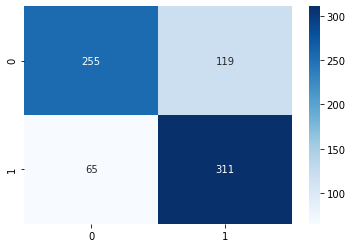

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:>

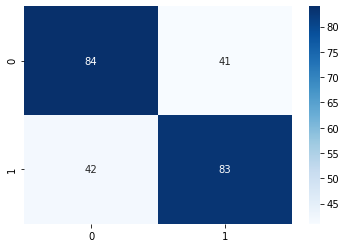

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       125
           1       0.67      0.66      0.67       125

    accuracy                           0.67       250
   macro avg       0.67      0.67      0.67       250
weighted avg       0.67      0.67      0.67       250



## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)


In [75]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [76]:
clf.best_estimator_


LogisticRegression(C=100)

In [77]:
clf_lr=LogisticRegression(C=100)

In [78]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=100)

In [79]:
y_train_pred=rf.predict(X_train)

In [80]:
y_test_pred=rf.predict(X_test)

## Model Evaluation

<AxesSubplot:>

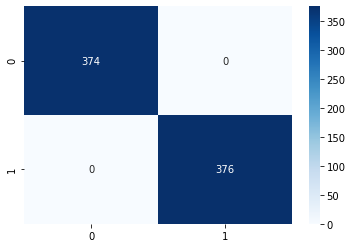

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<AxesSubplot:>

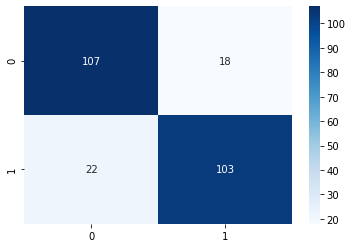

In [82]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       125
           1       0.85      0.82      0.84       125

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

